In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

plt.style.use(['science'])
plt.style.reload_library()

In [3]:
dfs = []
for run in range(8):
    df = pd.read_csv(f'/cosma6/data/dp004/dc-quer1/vaccine_paper_runs/baselines/results/run_00{run}/infection_locations_00{run}.csv')
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df.set_index('timestamp',inplace=True)
    dfs.append(df)

In [4]:
def average_dfs(summary_list):
    df_concat = pd.concat(summary_list)
    by_row_index = df_concat.groupby([df_concat.index, 'location_specs'])
    df_means = by_row_index.mean().reset_index().set_index('timestamp')
    df_std = (by_row_index.std()/np.sqrt(len(summary_list))).reset_index().set_index('timestamp')
    return df_means, df_std

In [5]:
df, std_df = average_dfs(dfs)

In [6]:
def plot_sum(mean_df, std_df, fields, ax, label,alpha=0.3):
    to_plot = mean_df[mean_df['location_specs'].isin(fields)]['0'].groupby('timestamp').sum()
    std_to_plot = std_df[std_df['location_specs'].isin(fields)]['0'].groupby('timestamp').mean()
    to_plot.plot(label=label)
    ax.fill_between(
        to_plot.index,
        to_plot - std_to_plot,
        to_plot + std_to_plot,
        alpha=alpha,
    )

In [7]:
df['location_specs'].unique()

array(['care_home', 'cinema', 'city_transport', 'company', 'grocery',
       'gym', 'hospital', 'household', 'infection_seed',
       'inter_city_transport', 'pub', 'school', 'university'],
      dtype=object)

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


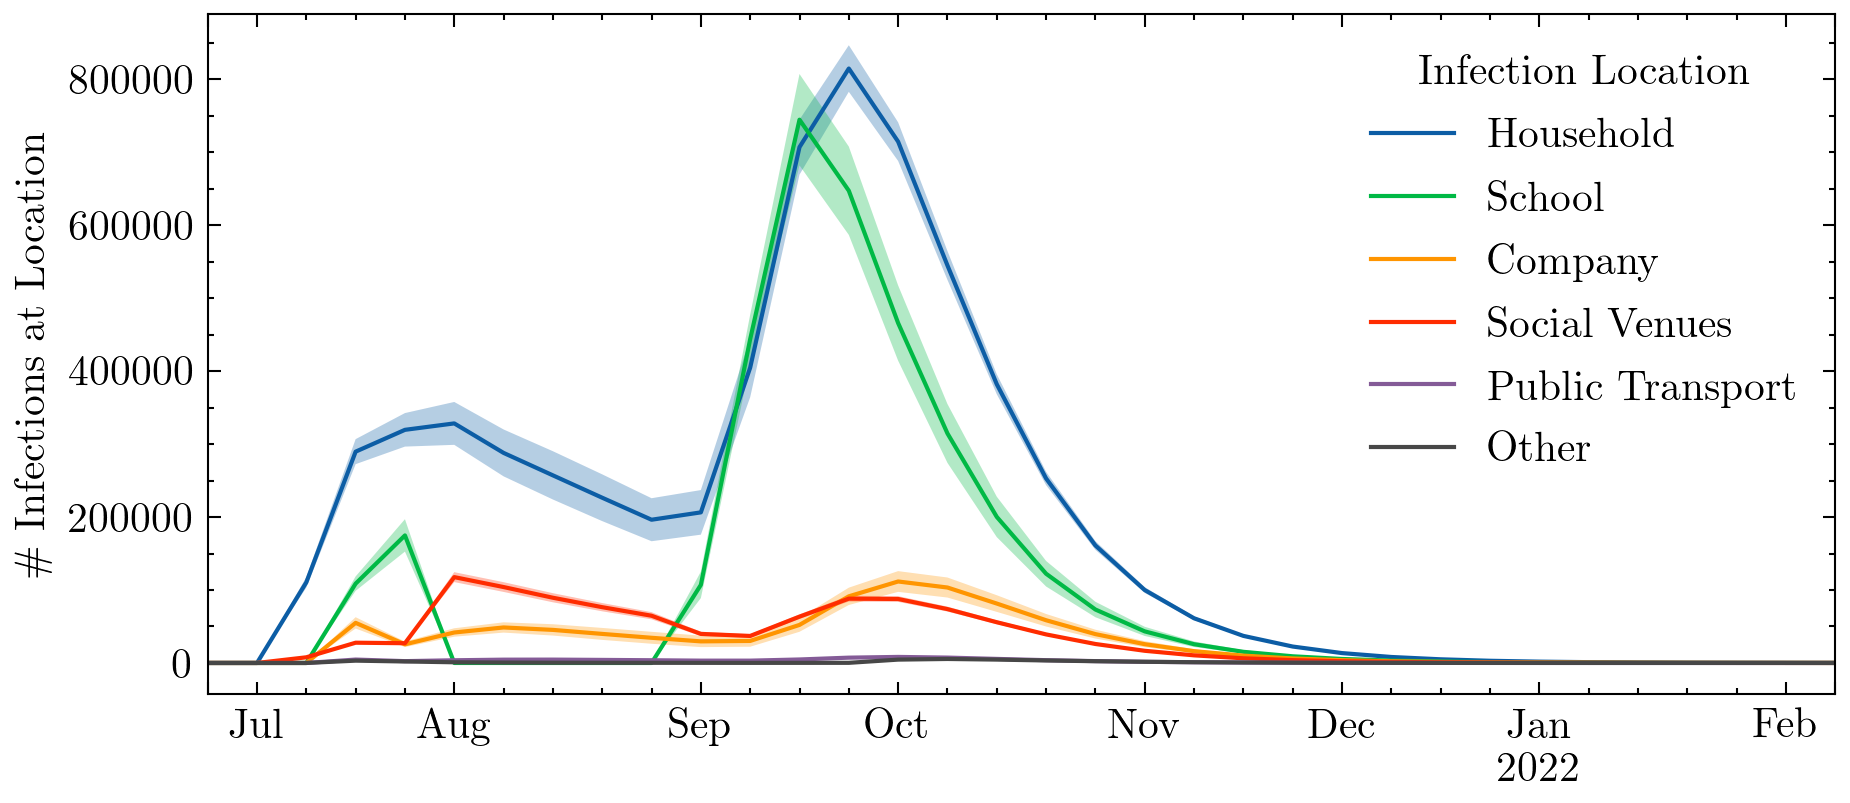

In [8]:
fig, ax = plt.subplots(figsize=(7,3))
plot_sum(df, std_df, 
         ['household','care_home'],ax=ax, label='Household')
plot_sum(df, std_df, 
         ['school'],ax=ax, label='School')
plot_sum(df, std_df, 
         ['company'],ax=ax, label='Company')
plot_sum(df, std_df, 
         ['cinema', 'gym','grocery','pub'],ax=ax, label='Social Venues')
plot_sum(df, std_df, 
         ['city_transport', 'inter_city_transport'],
         ax=ax, label='Public Transport')
plot_sum(df, std_df, 
         ['university', 'hospital'],
         ax=ax, label='Other')

plt.legend(title='Infection Location',bbox_to_anchor=(1,1))
plt.ylabel('\# Infections at Location')
plt.xlabel('')
plt.savefig('figures/infection_locations.pdf')